### Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
plt.style.use('dark_background')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/top-1000-bollywood-movies-and-their-box-office/Top 1000 Bollywood Movies and their boxoffice.csv


### Dataset reading

In [2]:
df = pd.read_csv('/kaggle/input/top-1000-bollywood-movies-and-their-box-office/Top 1000 Bollywood Movies and their boxoffice.csv', index_col='Unnamed: 0')

In [3]:
df.head()

,SN,Movie,Worldwide,India Net,India Gross,Overseas,Budget,Verdict
0,1,Pathaan,10500000000,5240000000,6570000000,3920000000,2500000000,All Time Blockbuster
1,2,Baahubali 2 The Conclusion,17880000000,5100000000,14160000000,3710000000,2500000000,All Time Blockbuster
2,3,KGF Chapter 2,12080000000,4350000000,10000000000,2070000000,1000000000,All Time Blockbuster
3,4,Dangal,20700000000,3740000000,5350000000,15350000000,700000000,All Time Blockbuster
4,5,Sanju,5880000000,3420000000,4380000000,1500000000,1000000000,All Time Blockbuster


In [4]:
df.tail()

,SN,Movie,Worldwide,India Net,India Gross,Overseas,Budget,Verdict
995,996,Nikamma,0,20000000,20000000,0,10000000,0
996,997,Saugandh,30000000,20000000,30000000,0,20000000,Average
997,998,Akaash Vani,30000000,20000000,20000000,0,100000000,Disaster
998,999,Zwigato,10000000,20000000,10000000,0,10000000,0
999,1000,FryDay,20000000,20000000,20000000,0,150000000,Disaster


In [5]:
df.sample(5)

,SN,Movie,Worldwide,India Net,India Gross,Overseas,Budget,Verdict
924,925,Sanam Bewafa,80000000,40000000,80000000,0,20000000,Hit
528,529,Agni Sakshi,310000000,190000000,300000000,0,40000000,Blockbuster
531,532,Fitoor,390000000,190000000,260000000,130000000,700000000,Disaster
102,103,2 States,1730000000,1020000000,1420000000,300000000,500000000,SuperHit
26,27,Golmaal Again,3080000000,2050000000,2620000000,450000000,800000000,Blockbuster


In [6]:
df.columns

Index(['SN', 'Movie', 'Worldwide', 'India Net', 'India Gross', 'Overseas',
       'Budget', 'Verdict'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SN           1000 non-null   int64 
 1   Movie        1000 non-null   object
 2   Worldwide    1000 non-null   int64 
 3   India Net    1000 non-null   int64 
 4   India Gross  1000 non-null   int64 
 5   Overseas     1000 non-null   int64 
 6   Budget       1000 non-null   int64 
 7   Verdict      1000 non-null   object
dtypes: int64(6), object(2)
memory usage: 70.3+ KB


In [8]:
df.isna().sum()

SN             0
Movie          0
Worldwide      0
India Net      0
India Gross    0
Overseas       0
Budget         0
Verdict        0
dtype: int64

In [9]:
df.duplicated().sum()

0

This dataset doesn't have any null or duplicate values😀

In [10]:
df.describe()

,SN,Worldwide,India Net,India Gross,Overseas,Budget
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,500.500000,1.832870e+09,4.079600e+08,6.126900e+08,9.714300e+08,5.889000e+08
std,288.819436,1.049006e+10,5.783055e+08,9.814085e+08,8.596981e+09,2.101992e+09
min,1.000000,0.000000e+00,2.000000e+07,0.000000e+00,0.000000e+00,0.000000e+00
25%,250.750000,1.600000e+08,9.000000e+07,1.400000e+08,1.000000e+07,8.000000e+07
50%,500.500000,3.700000e+08,2.000000e+08,3.100000e+08,5.000000e+07,2.000000e+08
75%,750.250000,9.025000e+08,4.600000e+08,6.825000e+08,1.500000e+08,4.000000e+08
max,1000.000000,1.897000e+11,5.240000e+09,1.416000e+10,1.690200e+11,3.200000e+10


### Exploring columns

In [11]:
df.Movie.nunique()

994

In [12]:
df.Verdict.value_counts()

Flop                    197
Hit                     194
Average                 134
SuperHit                112
Disaster                 85
Blockbuster              74
Below Average            68
Above Average            55
0                        51
All Time Blockbuster     30
Name: Verdict, dtype: int64

In [13]:
df['Verdict'] = df['Verdict'].replace('0', 'Neutral')

In [14]:
df.Verdict.value_counts()

Flop                    197
Hit                     194
Average                 134
SuperHit                112
Disaster                 85
Blockbuster              74
Below Average            68
Above Average            55
Neutral                  51
All Time Blockbuster     30
Name: Verdict, dtype: int64

## Analysis

### Top 5 Worldwide releases (values in cr.)

In [15]:
releases = df[['Movie','Worldwide']].sort_values(by='Worldwide',ascending = False).head(5)
releases

,Movie,Worldwide
78,Avengers End Game,189700000000
66,Avatar: The Way of Water,173800000000
867,Top Gun: Maverick,122500000000
235,Spider-Man: No Way Home,101700000000
490,Black Panther: Wakanda Forever,66340000000


In [16]:
fig = go.Figure(data=go.Bar(x=releases['Movie'],y=releases['Worldwide']))
fig.update_layout(title="Top 5 Movies by worldwide collection",xaxis_title='Movies',yaxis_title="Collection")
fig.update_traces(hovertemplate='Movie: %{x}<br>Worldwide Collection: %{y}')
fig.show()

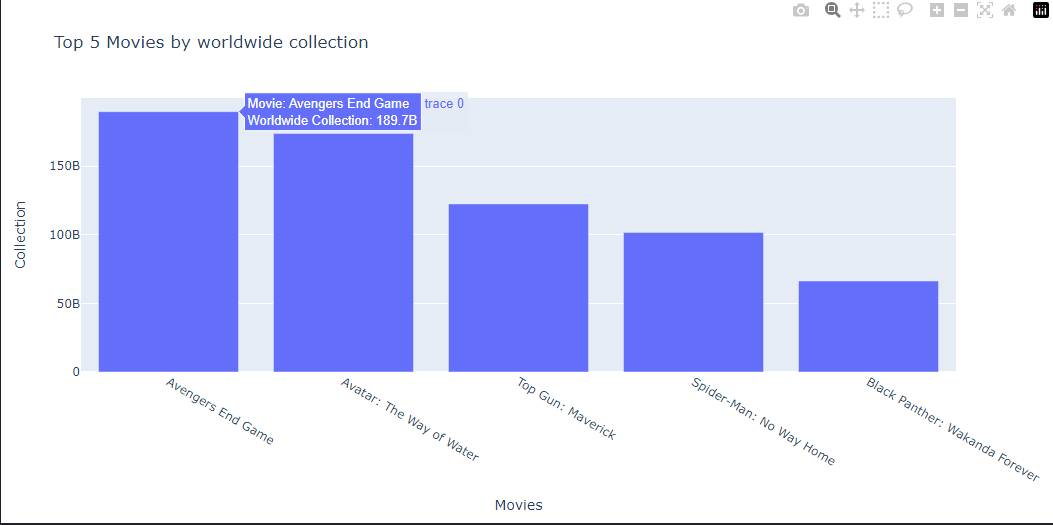

'Avengers End Game' is on top as per worldwide collection

### Top 5 Indian Releases (values in cr.)

In [17]:
releases = df[['Movie','India Net']].sort_values(by='India Net',ascending=False).head(5)
releases

,Movie,India Net
0,Pathaan,5240000000
1,Baahubali 2 The Conclusion,5100000000
2,KGF Chapter 2,4350000000
3,Dangal,3740000000
4,Sanju,3420000000


In [18]:
fig = go.Figure(data=go.Bar(x=releases['Movie'],y=releases['India Net'],marker_color='orange'))
fig.update_layout(title="Top 5 Indian Releases",xaxis_title="Movies",yaxis_title="Collection")
fig.update_traces(hovertemplate='Movie: %{x}<br>India Net Collection: %{y}')
fig.show()

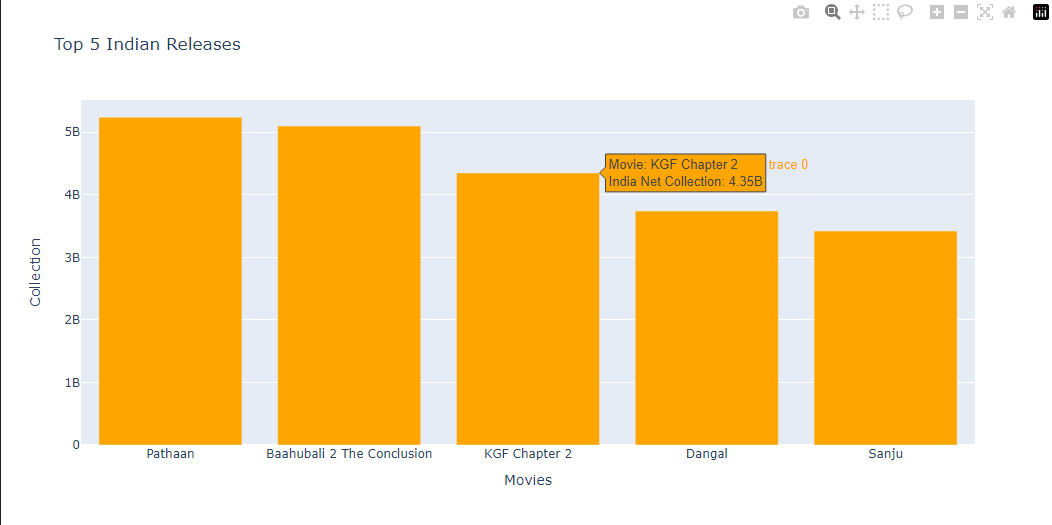

'Pathan' is on top as per Indian Releases

### Top 5 movies by Budget (values in cr.)

In [19]:
releases = df[['Movie','Budget']].sort_values(by='Budget',ascending=False).head(5)
releases

,Movie,Budget
66,Avatar: The Way of Water,32000000000
78,Avengers End Game,25000000000
376,Thor: Love And Thunder,19000000000
932,No Time To Die,18500000000
486,Black Adam,15000000000


In [20]:
fig = go.Figure(data=go.Bar(x=releases['Movie'],y=releases['Budget']))
fig.update_layout(title="Top 5 Movies by budget",xaxis_title='Movies',yaxis_title="Budget")
fig.update_traces(hovertemplate='Movie: %{x}<br>Movie Budget: %{y}')
fig.show()

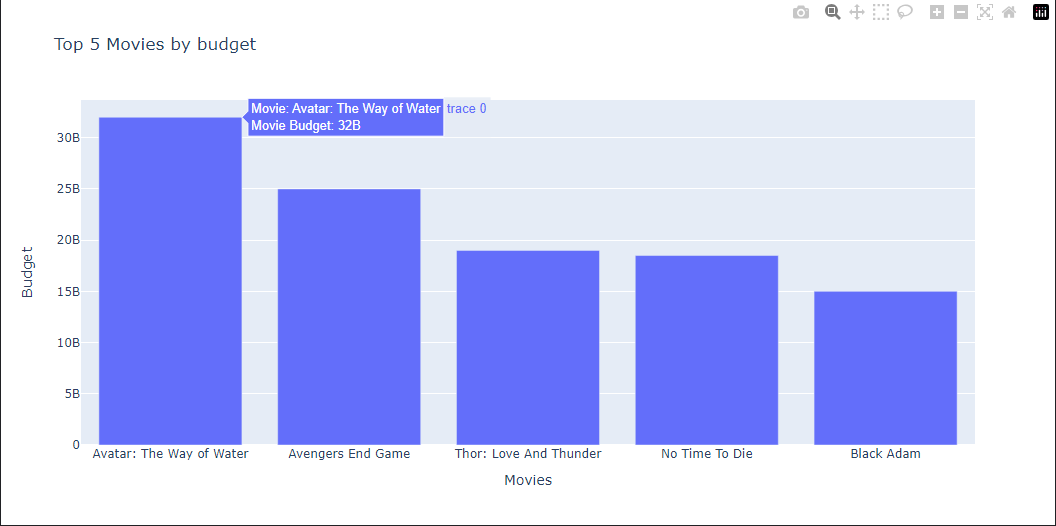

'Avatar: The Way of Water' had the highest budget allocated

### Distribution of Verdicts

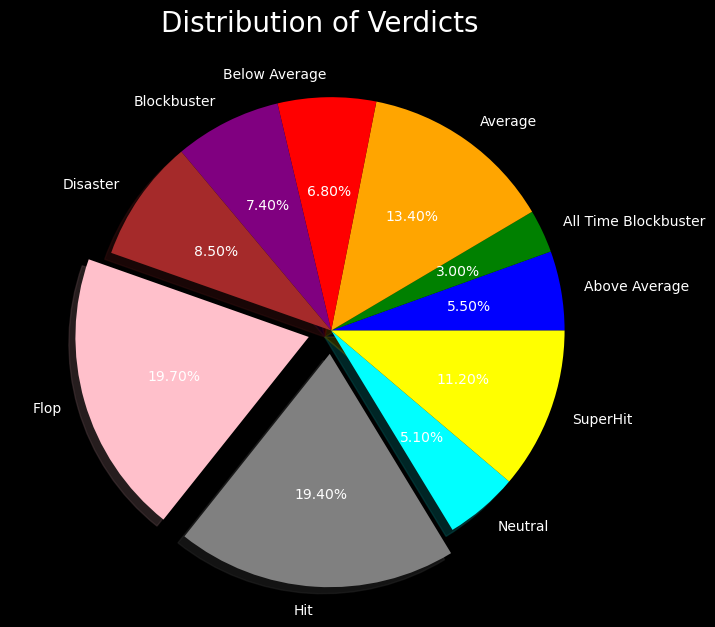

In [21]:
verdict_df=df.groupby("Verdict").size().reset_index().rename(columns={0:"Count"})
explode = (0, 0, 0, 0,0, 0, 0.1,0.1, 0, 0) 
plt.figure(figsize=(8, 7))
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'yellow']
plt.pie(verdict_df["Count"], labels=verdict_df["Verdict"], autopct="%1.2f%%", explode=explode, shadow=True, colors=colors,
        textprops={'color': 'white'})  # Change text color here
plt.title("Distribution of Verdicts", fontsize=20,  pad=30)
plt.axis('equal')
plt.show()

40% movies were either Flop or Hit (19.7% Flop and 19.4% Hit)

### Movies with same name

In [22]:
same_name_movies=df[df.duplicated('Movie', keep=False)].sort_values(by='Movie')
same_name_movies

,SN,Movie,Worldwide,India Net,India Gross,Overseas,Budget,Verdict
559,560,Aankhen,290000000,170000000,230000000,50000000,150000000,Average
646,647,Aankhen,180000000,130000000,180000000,0,20000000,All Time Blockbuster
47,48,Dilwale,3880000000,1480000000,2120000000,1760000000,1650000000,Average
858,859,Dilwale,120000000,60000000,80000000,30000000,20000000,SuperHit
522,523,Hulchul,310000000,200000000,280000000,30000000,100000000,Hit
876,877,Hulchul,80000000,50000000,80000000,0,40000000,Below Average
448,449,Khoobsurat,530000000,240000000,330000000,200000000,180000000,Average
785,786,Khoobsurat,150000000,80000000,140000000,0,60000000,Above Average
175,176,Love Aaj Kal,1170000000,660000000,860000000,310000000,500000000,Hit
292,293,Love Aaj Kal,570000000,400000000,470000000,100000000,600000000,Flop


<Figure size 1000x600 with 0 Axes>

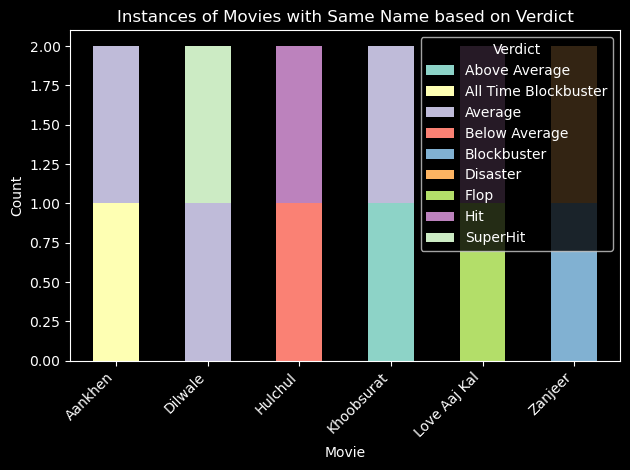

In [23]:
grouped_by_movie_verdict = same_name_movies.groupby(['Movie', 'Verdict']).size().unstack()

# Plot the bar chart with adjusted height
plt.figure(figsize=(10, 6))

grouped_by_movie_verdict.plot(kind='bar', stacked=True)
plt.xlabel('Movie')
plt.ylabel('Count')
plt.title('Instances of Movies with Same Name based on Verdict')
plt.xticks(rotation=45, ha='right')
plt.legend(title="Verdict")
plt.tight_layout()
plt.show()

There are 6 movies which are released with same name but their verdicts were changed after releasing again with same name may be because of new story or actors' performance

## Insights

* Avengers End Game is on top as per worldwide collection
* 'Pathan' is on top as per Indian Releases
* 'Avatar: The Way of Water' had the highest budget allocated
* 40% movies were either Flop or Hit (19.7% Flop and 19.4% Hit)
* There is 6 movies which are released with same name but their verdicts were changed after releasing again with same name may be because of new story or actors' performance